In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws'],
      dtype='object')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age_company,python_jb,spark,excel,r_lang,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,19.0,Tecolote Research\n,NM,0,50,1,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,24.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,5.0,KnowBe4\n,FL,1,13,1,1,1,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,20.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,28.5,Affinity Solutions\n,NY,1,25,1,0,1,0,0


In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
#FIX state los angeles

df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 UT              10
 IN              10
 WI              10
 MO               9
 AZ               9
 AL               8
 KY               6
 DE               6
 GA               6
 MI               6
 IA               5
 CT               5
 LA               4
 NE               4
 OR               4
 NM               3
 KS               3
 MN               2
 ID               2
 Los Angeles      1
 SC               1
 RI               1
Name: job_state, dtype: int64

In [11]:
df['job_state'] = df['job_state'].apply(lambda x:x.strip() if x.strip().lower()!= 'los angeles' else 'CA')

In [12]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
KY      6
GA      6
MI      6
DE      6
CT      5
IA      5
LA      4
NE      4
OR      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [13]:
df['desc_length'] = df['Job Description'].apply(lambda x:len(x))

In [14]:
#competitor count
df['no_of_Competitors'] = df['Competitors'].apply(lambda x:len(x.split(',')) if x !=-1 else 0)

In [15]:
df['no_of_Competitors'].value_counts()

1    472
3    228
2     41
4      1
Name: no_of_Competitors, dtype: int64

In [16]:
#hourly wage to annanal wage

df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)

In [17]:
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [18]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [19]:
#remove new line char in job title

df['company_txt'] = df['company_txt'].apply(lambda x:x.replace('\n',''))

In [20]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [21]:
df.describe()

,Rating,Founded,hourly,Employer Provided,min_salary,max_salary,avg_salary,same_state,age_company,python_jb,spark,excel,r_lang,aws,desc_length,no_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,26.557278,0.557951,49.389488,0.528302,0.225067,0.522911,0.002695,0.237197,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,9.913037,0.496965,53.962906,0.499535,0.417908,0.499812,0.051882,0.425651,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,0.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,20.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,26.500000,1.000000,27.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,32.500000,1.000000,62.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,71.500000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority',
       'desc_length', 'no_of_Competitors'],
      dtype='object')

<AxesSubplot:>

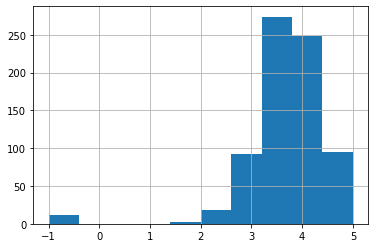

In [23]:
df.Rating.hist()
#pretty close to normal dist

<AxesSubplot:>

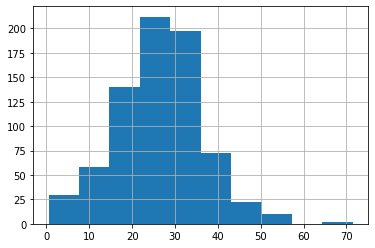

In [24]:
df.avg_salary.hist()
#pretty close to normal dist

<AxesSubplot:>

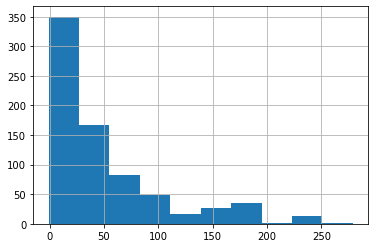

In [25]:
df.age_company.hist()
#exp distribution

<AxesSubplot:>

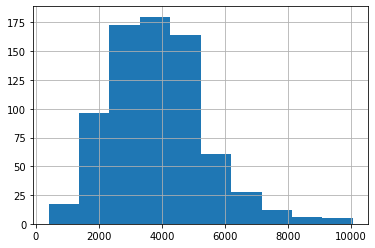

In [26]:
df.desc_length.hist()
#pretty close to normal dist

<AxesSubplot:>

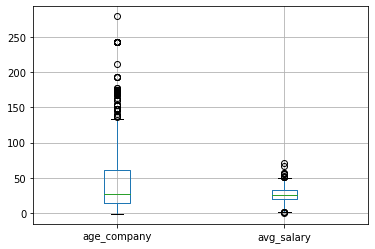

In [27]:
df.boxplot(column = ['age_company','avg_salary'])

<AxesSubplot:>

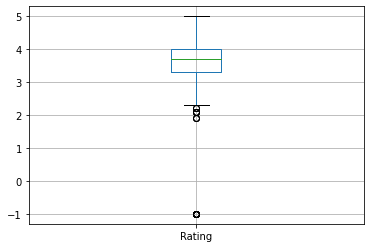

In [28]:
df.boxplot(column = ['Rating'])

In [29]:
df[['age_company','avg_salary','Rating','desc_length']].corr()

,age_company,avg_salary,Rating,desc_length
age_company,1.000000,0.072302,0.026164,0.164730
avg_salary,0.072302,1.000000,0.078041,0.084936
Rating,0.026164,0.078041,1.000000,-0.012281
desc_length,0.164730,0.084936,-0.012281,1.000000


<AxesSubplot:>

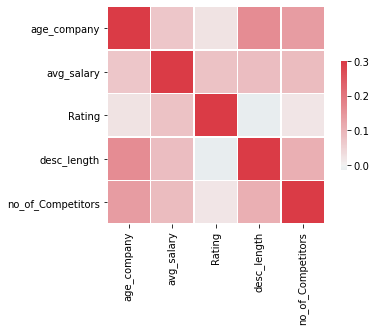

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age_company','avg_salary','Rating','desc_length','no_of_Competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
#categorical variables
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority',
       'desc_length', 'no_of_Competitors'],
      dtype='object')

In [32]:
df_catg = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt','job_state'
   ,'same_state','python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority']]

Graph for Location: total = 200


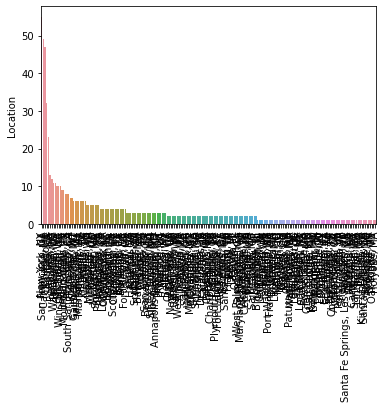

Graph for Headquarters: total = 198


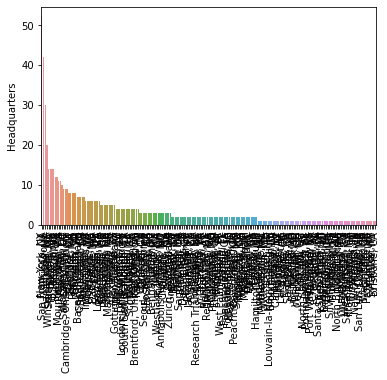

Graph for Size: total = 9


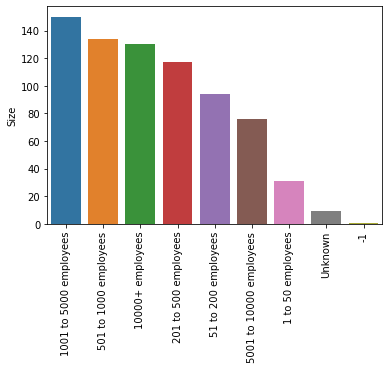

Graph for Type of ownership: total = 11


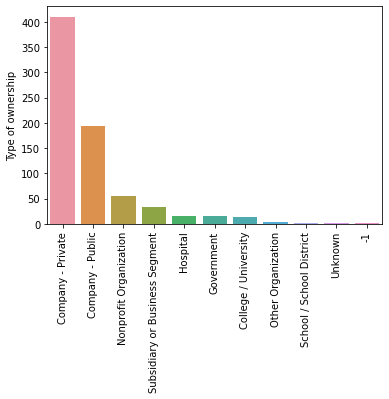

Graph for Industry: total = 60


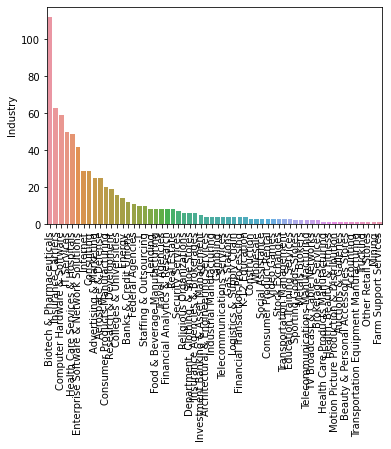

Graph for Sector: total = 25


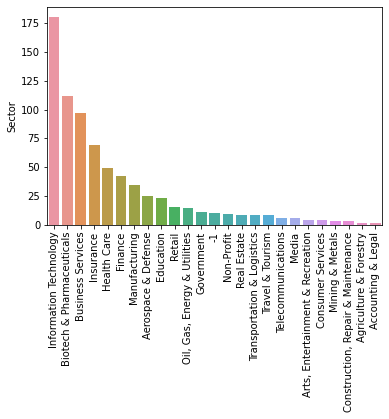

Graph for Revenue: total = 14


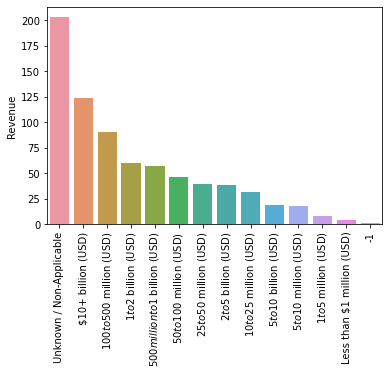

Graph for company_txt: total = 343


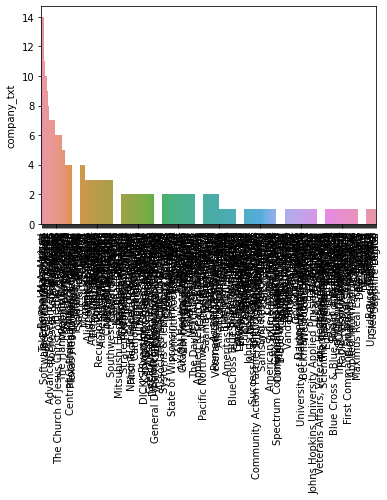

Graph for job_state: total = 37


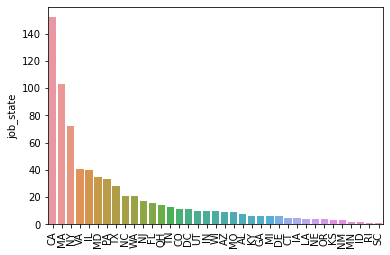

Graph for same_state: total = 2


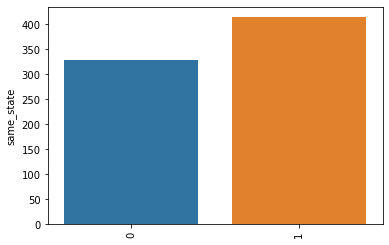

Graph for python_jb: total = 2


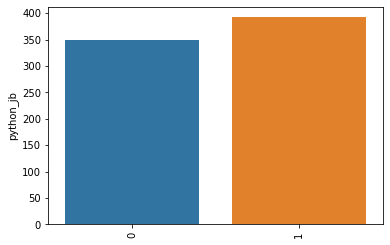

Graph for spark: total = 2


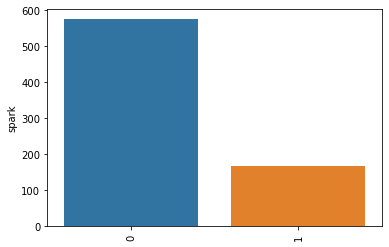

Graph for excel: total = 2


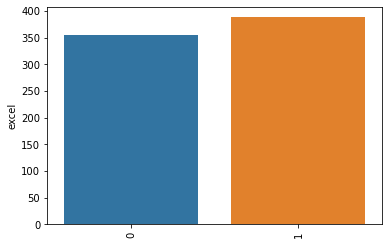

Graph for r_lang: total = 2


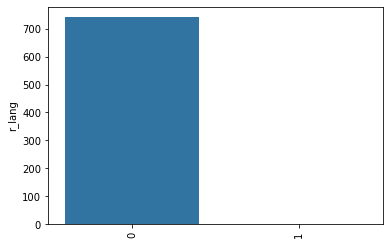

Graph for aws: total = 2


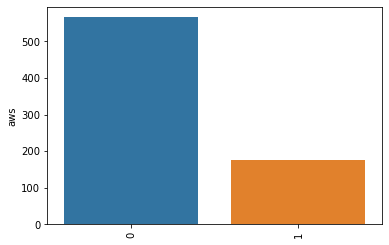

Graph for job_simp: total = 7


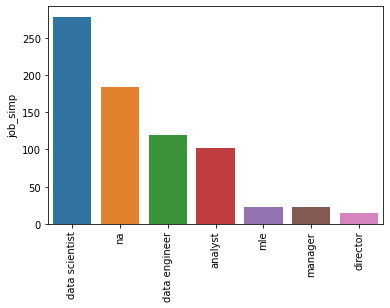

Graph for seniority: total = 3


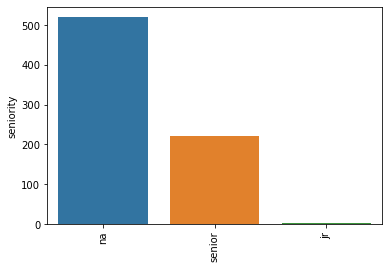

In [33]:
for i in df_catg.columns:
    cat_num = df_catg[i].value_counts()
    print('Graph for %s: total = %d'%(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority',
       'desc_length', 'no_of_Competitors'],
      dtype='object')

In [35]:
pd.pivot_table(df, index='job_simp',values = 'avg_salary')

,avg_salary
job_simp,
analyst,19.024510
data engineer,29.252101
data scientist,27.682796
director,39.607143
manager,25.931818
mle,36.068182
na,25.228261


In [36]:
pd.pivot_table(df, index=['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          19.500000
               na          17.817568
               senior      22.314815
data engineer  na          28.152439
               senior      31.689189
data scientist jr          25.500000
               na          26.053763
               senior      31.000000
director       na          39.607143
manager        na          25.931818
mle            na          33.266667
               senior      42.071429
na             na          22.161417
               senior      32.061404

In [37]:
pd.pivot_table(df, index = 'job_state', values='avg_salary').sort_values('avg_salary', ascending= False)

,avg_salary
job_state,
CA,31.085526
KY,30.666667
NC,29.404762
MD,29.042857
MA,28.660194
IL,28.312500
NJ,27.735294
PA,26.560606
NY,26.527778


In [38]:
pd.pivot_table(df, index = ['job_state','job_simp'], values='avg_salary').sort_values('avg_salary', ascending= False)

,,avg_salary
job_state,job_simp,
IL,director,47.583333
CA,mle,43.300000
AZ,na,41.500000
PA,mle,40.928571
NJ,director,37.500000
...,...,...
CT,na,8.500000
CO,na,7.500000
DE,na,6.500000


In [39]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [40]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [41]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
job_state,
CA,32.536765
UT,32.500000
MO,30.000000
PA,29.333333
IL,28.900000
NY,28.225000
MA,28.016667
NC,27.666667
WI,27.500000


In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age_company', 'python_jb',
       'spark', 'excel', 'r_lang', 'aws', 'job_simp', 'seniority',
       'desc_length', 'no_of_Competitors'],
      dtype='object')

In [43]:
#rating, industry, sector, revenue, no_of_Competitors, hourly, Employer Provided, python_jb,spark,excel, r_lang,
#aws,desc_length,

df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'no_of_Competitors', 
                'hourly', 'Employer Provided', 'python_jb', 'r_lang', 'spark', 'aws', 'excel',
                'Type of ownership','avg_salary']]


In [44]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.6     33.500000
 4.5     31.571429
 2.1     30.700000
 4.4     29.757576
 3.9     29.103175
 3.2     28.300000
 4.0     28.212766
 4.3     28.187500
 3.5     27.979592
 4.7     27.661290
 2.5     27.500000
 3.7     27.327869
 2.7     27.321429
 2.9     27.250000
 3.1     26.980000
 3.3     26.346154
 4.2     25.980769
 3.8     25.549180
 2.2     25.250000
 1.9     25.166667
 4.6     25.150000
 3.4     24.897727
 4.1     24.052632
 3.6     23.619565
 2.8     23.214286
 3.0     22.000000
 2.3     22.000000
 2.4     19.500000
-1.0     17.454545
 4.8     16.833333
 5.0     11.700000
Industry
                                          avg_salary
Industry                                            
Motion Picture Production & Distribution   44.000000
Brokerage Services                         38.000000
Other Retail Stores                        37.500000
Financial Analytics & Research             33.750000
Auctions & Galleries                   

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [45]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_jb', values = 'avg_salary', aggfunc = 'count')

python_jb,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [46]:
# word clouds on job description

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
# import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

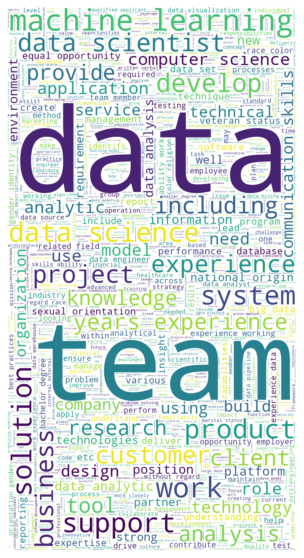

In [47]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.